<a href="https://www.kaggle.com/code/mohsinmshabbir/email-classification-naive-bayes-logregression?scriptVersionId=187139648" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Setting Up Anaconda Environment

In [2]:
# conda create -n spam_filter_env python=3.8
# conda activate spam_filter_env
# conda install pandas numpy scikit-learn nltk jupyter notebook
# python -m nltk.downloader stopwords

# Importing Libraries

In [3]:
import pandas as pd
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')
print("All libraries are successfully imported!")


All libraries are successfully imported!


[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#! python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Importing Data

In [5]:
df = pd.read_csv("email_classification.csv")
df.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham


# Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 179 entries, 0 to 178

Data columns (total 2 columns):

 #   Column  Non-Null Count  Dtype 

---  ------  --------------  ----- 

 0   email   179 non-null    object

 1   label   179 non-null    object

dtypes: object(2)

memory usage: 2.9+ KB


In [7]:
df.label.value_counts()

label
ham     100
spam     79
Name: count, dtype: int64

In [8]:
any_nan = df['email'].isna().any()
print(any_nan)

False


In [9]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'^[^ ]<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_quotes(text):
    quotes = re.compile(r'[^A-Za-z0-9\s]+')
    return re.sub(quotes, '', text)


# Applying helper functions
df1 = df.copy()
df1['email'] = df1['email'].apply(lambda x: remove_URL(x))
df1['email'] = df1['email'].apply(lambda x: remove_emoji(x))
df1['email'] = df1['email'].apply(lambda x: remove_html(x))
df1['email'] = df1['email'].apply(lambda x: remove_punct(x))
df1['email'] = df1['email'].apply(lambda x: remove_quotes(x))
df1['email'] = df1['email'].str.lower()

In [10]:
df1.head()

,email,label
0,upgrade to our premium plan for exclusive acce...,ham
1,happy holidays from our team wishing you joy a...,ham
2,were hiring check out our career opportunities...,ham
3,your amazon account has been locked click here...,spam
4,your opinion matters take our survey and help ...,ham


In [11]:
df2 = df1.copy()
def clean_review_text(text):
  doc = nlp(text)
  tokens = [token.lemma_ for token in doc if not token.is_digit
            and not token.is_space]
  return " ".join(tokens)

df2['email'] = df2["email"].apply(clean_review_text)

# Exploratary Data Analysis

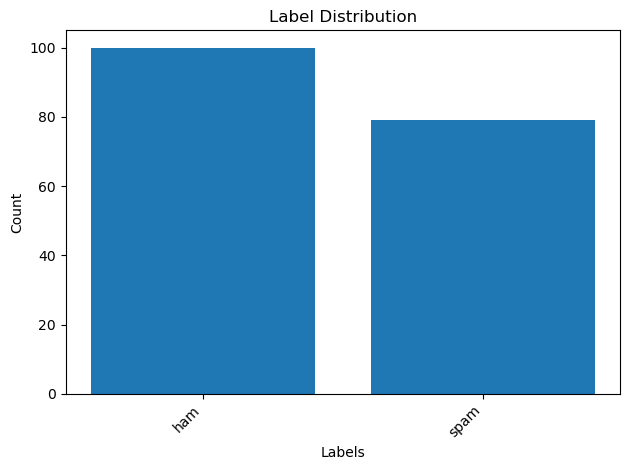

In [12]:
# Calculate sentiment counts
sentiment_counts = df2['label'].value_counts()

# Get values for x-axis and y-axis
x = sentiment_counts.index.astype(str).to_list()  # Ensure string labels for x-axis
y = sentiment_counts.values.tolist()

# Create the bar chart
plt.bar(x, y)

# Customize the plot
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust layout for better visibility
plt.tight_layout()

# Display the plot
plt.show()

# Baseline Model

In [13]:
X = df2['email']
Y = df2['label']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    stratify = Y,
                                                    random_state = 34)

In [15]:
#Initialize the tf-id vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

#Using the vectorizer to fit on out training data and testing data
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

# Traditional Machine Learning Method

## Naive Bayes

In [16]:
#Initialize the Naive Bayes classifier
best_accuracy = 0
a = 0.1
while a <= 1:
  nb = MultinomialNB(alpha=a)

  #Fitting the model
  nb.fit(tfidf_train, Y_train)
  curr_accuracy = nb.score(tfidf_test, Y_test)
  print(f"Accuracy with alpha {a}: {curr_accuracy}")
  # Predict the labels
  if curr_accuracy > best_accuracy:
    best_accuracy = curr_accuracy
    y_pred = nb.predict(tfidf_test)
  a = a + 0.05

Accuracy with alpha 0.1: 0.9722222222222222

Accuracy with alpha 0.15000000000000002: 0.9722222222222222

Accuracy with alpha 0.2: 0.9722222222222222

Accuracy with alpha 0.25: 0.9722222222222222

Accuracy with alpha 0.3: 0.9722222222222222

Accuracy with alpha 0.35: 0.9722222222222222

Accuracy with alpha 0.39999999999999997: 0.9722222222222222

Accuracy with alpha 0.44999999999999996: 0.9722222222222222

Accuracy with alpha 0.49999999999999994: 0.9722222222222222

Accuracy with alpha 0.5499999999999999: 0.9722222222222222

Accuracy with alpha 0.6: 0.9722222222222222

Accuracy with alpha 0.65: 0.9722222222222222

Accuracy with alpha 0.7000000000000001: 0.9722222222222222

Accuracy with alpha 0.7500000000000001: 0.9722222222222222

Accuracy with alpha 0.8000000000000002: 0.9722222222222222

Accuracy with alpha 0.8500000000000002: 0.9722222222222222

Accuracy with alpha 0.9000000000000002: 0.9722222222222222

Accuracy with alpha 0.9500000000000003: 0.9722222222222222


In [17]:
# Print classification report
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred))



Classification Report:



              precision    recall  f1-score   support



         ham       0.95      1.00      0.98        20

        spam       1.00      0.94      0.97        16



    accuracy                           0.97        36

   macro avg       0.98      0.97      0.97        36

weighted avg       0.97      0.97      0.97        36




## Logistic Regression

In [18]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(tfidf_train, Y_train)

logistic_prediction = logistic_regression.predict(tfidf_test)
logistic_accuracy = accuracy_score(Y_test, logistic_prediction)
print(f"Accuracy: {logistic_accuracy}")

Accuracy: 0.9722222222222222


In [19]:
# Print the Classification Report
cr = classification_report(Y_test, logistic_prediction)
print("\n\nClassification Report\n")
print(cr)





Classification Report



              precision    recall  f1-score   support



         ham       0.95      1.00      0.98        20

        spam       1.00      0.94      0.97        16



    accuracy                           0.97        36

   macro avg       0.98      0.97      0.97        36

weighted avg       0.97      0.97      0.97        36




# Pediction using our Models

In [22]:
def predict_email(email, model, vectorizer):
    # Preprocess the input email
    email = remove_URL(email)
    email = remove_emoji(email)
    email = remove_html(email)
    email = remove_punct(email)
    email = remove_quotes(email)
    email = email.lower()
    email = clean_review_text(email)
    
    # Transform the email using the TF-IDF vectorizer
    email_tfidf = vectorizer.transform([email])
    
    # Predict the label
    prediction = model.predict(email_tfidf)
    return prediction[0]

# Example usage
input_email = """
Hi Mohsin,

I hope this email finds you well. I wanted to let you know about an exclusive opportunity that you might find interesting. Our company, BestDeals Corp., is offering a limited-time discount on all our premium products, just for our valued customers like you.

Visit our website at www.bestdeals.com to check out the latest offers and use the code "SPECIAL20" at checkout to get 20% off your next purchase. Don't miss out on this chance to save big on items you've been eyeing.

Additionally, we're hosting a free webinar on financial planning next week. It's a great opportunity to gain insights from industry experts. Register now to reserve your spot: https://bestdeals.com/webinar-registration.

Thank you for being a loyal customer. If you have any questions, feel free to reply to this email or contact our support team.

Best regards,
Jane Doe
Customer Relations Manager
BestDeals Corp.
"""

print(f"Prediction of Naive Bayes: {predict_email(input_email, nb, vectorizer)}")
print(f"Prediction of Logistic Regression: {predict_email(input_email, logistic_regression, vectorizer)}")

Prediction of Naive Bayes: ham

Prediction of Logistic Regression: ham
